In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style = "darkgrid")

import altair as alt


In [4]:
df = pd.read_csv(r"C:\Users\phili\Python Projects\Chemistry-Capstone\evaluation\Scikit-learn_Evaluation_Results.csv")

### split out time metric because this is not a float type
time_df = df[df['metric'] == "fit_time"]
df = df[df['metric'] != "fit_time"]
df['score'] = df['score'].astype(float)

In [5]:
df.head()

,dataset,split_method,split_id,model,metric,score
0,bace,random,train,SVC,accuracy_score,0.986003
1,bace,random,validate,SVC,accuracy_score,0.828194
2,bace,random,train,SVC,f1_score,0.989535
3,bace,random,validate,SVC,f1_score,0.876972
4,bace,random,train,SVC,roc_auc_score,0.981963


In [6]:
time_df.head()

,dataset,split_method,split_id,model,metric,score
10,bace,random,NaN,SVC,fit_time,0:00:01.081678
21,bace,random,NaN,LogisticRegression,fit_time,0:00:00.265683
32,bace,random,NaN,RandomForestClassifier,fit_time,0:00:00.223001
43,bace,random,NaN,KNeighborsClassifier,fit_time,0:00:00.004001
54,bace,random,NaN,GradientBoostingClassifier,fit_time,0:00:00.767002


In [7]:
df.groupby(["split_method", "split_id", "model", "metric"]).agg({"score": ["mean", "std"]})

score  \
                                                                        mean   
split_method split_id model                      metric                        
random       train    DummyClassifier            accuracy_score     0.872894   
                                                 f1_score           0.296954   
                                                 log_loss           4.390128   
                                                 matthews_corrcoef  0.000000   
                                                 roc_auc_score      0.500000   
                      GradientBoostingClassifier accuracy_score     0.904811   
                                                 f1_score           0.420611   
                                                 log_loss           3.287724   
                                                 matthews_corrcoef  0.294592   
                                                 roc_auc_score      0.573453   
                      KNeighborsClassifier       accuracy_score     0.934345   
                                                 f1_score           0.678699   
                                                 log_loss           2.267679   
                                                 matthews_corrcoef  0.576647   
                                                 roc_auc_score      0.735487   
                      LogisticRegression         accuracy_score     0.977704   
                                                 f1_score           0.843737   
                                                 log_loss           0.770075   
                                                 matthews_corrcoef  0.824636   
                                                 roc_auc_score      0.876638   
                      RandomForestClassifier     accuracy_score     0.996210   
                                                 f1_score           0.983252   
                                                 log_loss           0.130902   
                                                 matthews_corrcoef  0.979529   
                                                 roc_auc_score      0.986583   
                      SVC                        accuracy_score     0.984333   
                                                 f1_score           0.848389   
                                                 log_loss           0.541123   
                                                 matthews_corrcoef  0.852379   
                                                 roc_auc_score      0.899590   
             validate DummyClassifier            accuracy_score     0.878283   
                                                 f1_score           0.299475   
                                                 log_loss           4.204005   
                                                 matthews_corrcoef  0.000000   
                                                 roc_auc_score      0.500000   
                      GradientBoostingClassifier accuracy_score     0.905916   
                                                 f1_score           0.422741   
                                                 log_loss           3.249571   
                                                 matthews_corrcoef  0.275025   
                                                 roc_auc_score      0.569860   
                      KNeighborsClassifier       accuracy_score     0.911435   
                                                 f1_score           0.549205   
                                                 log_loss           3.058971   
                                                 matthews_corrcoef  0.343306   
                                                 roc_auc_score      0.646109   
                      LogisticRegression         accuracy_score     0.912069   
                                                 f1_score           0.570737   
                                                 log_loss           3.0

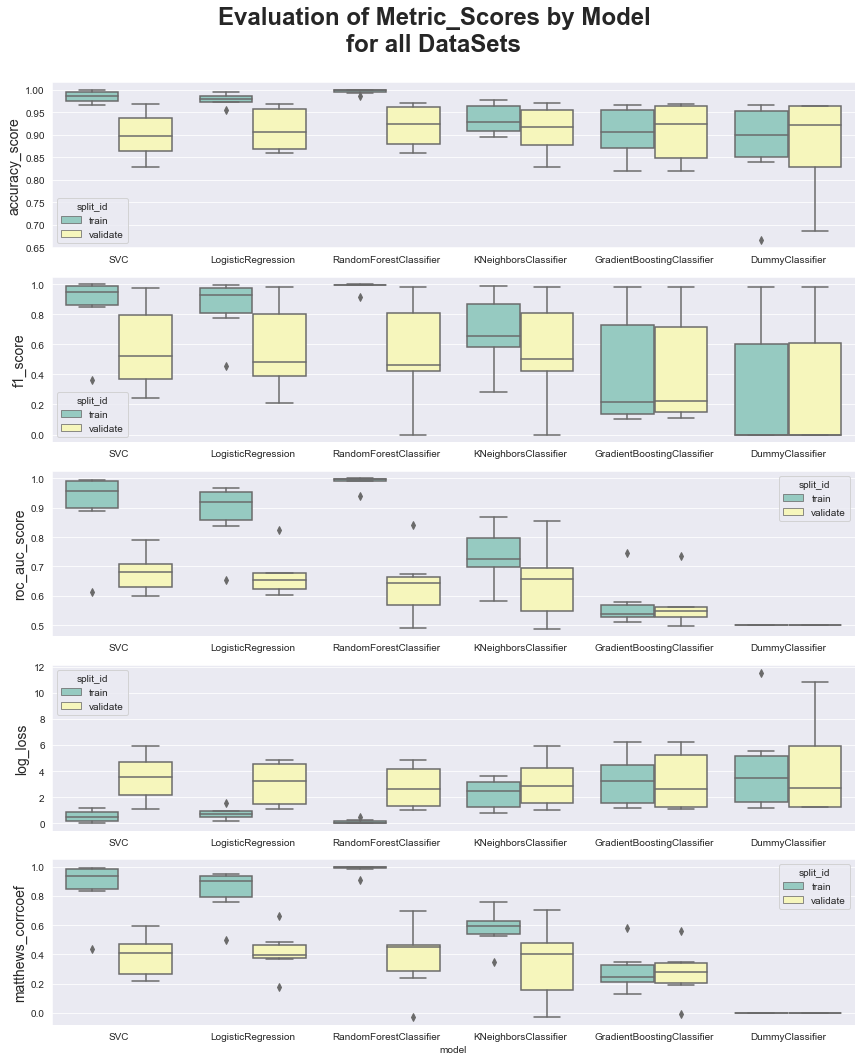

In [8]:
metrics = df['metric'].unique()

fig, axes = plt.subplots(len(metrics), figsize = (12,15))

for i, metric in enumerate(metrics):
    sns.boxplot(x="model", y="score", hue="split_id",
        data=df[df['metric'] == metric], palette="Set3", ax= axes[i])
    
    axes[i].set_ylabel(metric, fontsize = 14)
    if i != len(metrics) -1:
        axes[i].set_xlabel(None)
        
plt.suptitle("Evaluation of Metric_Scores by Model\nfor all DataSets\n", fontsize = 24, fontweight = "bold")
fig.tight_layout()

fig.savefig("Boxplot_Model_Scores.png", facecolor = "w")



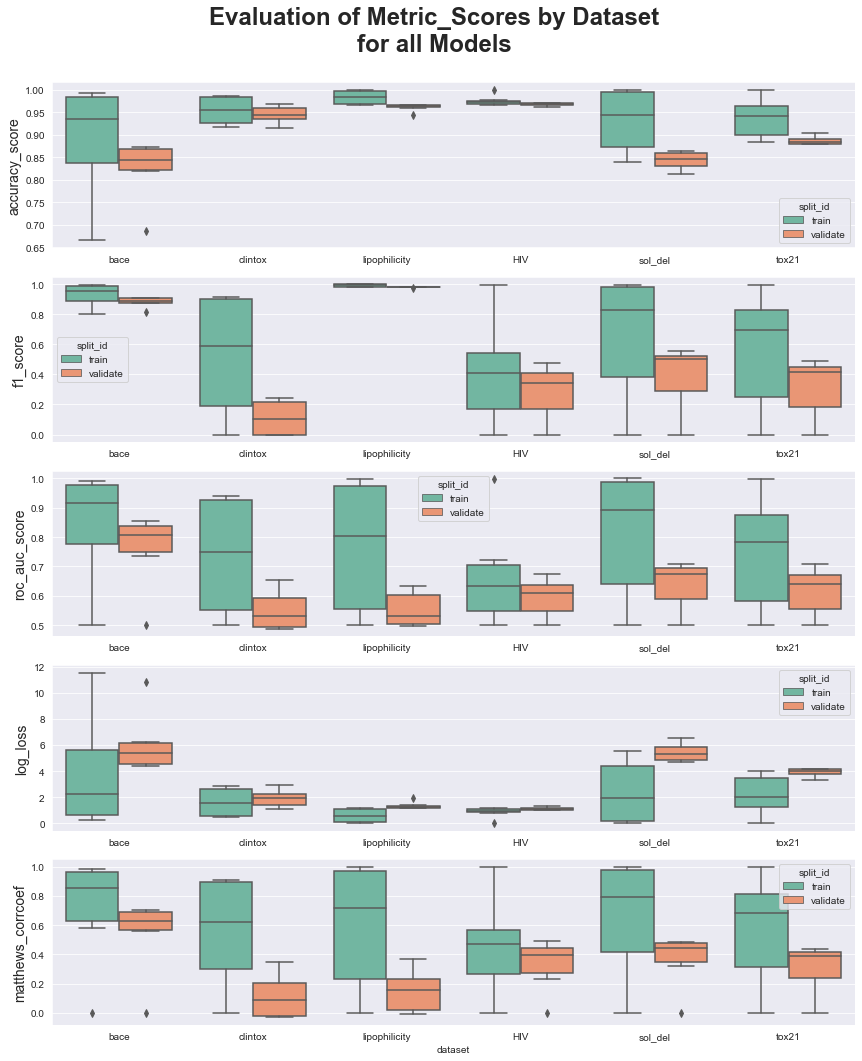

In [9]:
fig, axes = plt.subplots(len(metrics), figsize = (12,15))

for i, metric in enumerate(metrics):
    sns.boxplot(x="dataset", y="score", hue="split_id",
        data=df[df['metric'] == metric], palette="Set2", ax= axes[i])
    
    axes[i].set_ylabel(metric, fontsize = 14)
    if i != len(metrics) -1:
        axes[i].set_xlabel(None)
        
plt.suptitle("Evaluation of Metric_Scores by Dataset\nfor all Models\n", fontsize = 24, fontweight = "bold")
fig.tight_layout()

fig.savefig("Boxplot_Dataset_Scores.png", facecolor = "w")

In [11]:
df.sample(10)

,dataset,split_method,split_id,model,metric,score
349,tox21,random,train,LogisticRegression,matthews_corrcoef,0.760842
194,lipophilicity,random,validate,DummyClassifier,log_loss,1.206144
38,bace,random,validate,KNeighborsClassifier,roc_auc_score,0.853332
52,bace,random,train,GradientBoostingClassifier,matthews_corrcoef,0.582157
59,bace,random,train,DummyClassifier,roc_auc_score,0.500000
270,sol_del,random,train,SVC,log_loss,0.108160
234,HIV,random,validate,KNeighborsClassifier,f1_score,0.475073
102,clintox,random,validate,KNeighborsClassifier,f1_score,0.000000
256,HIV,random,validate,DummyClassifier,f1_score,0.000000
143,lipophilicity,random,train,LogisticRegression,accuracy_score,0.994118


In [12]:
### load chemprop results and normalize to simple model results format
cp_df = pd.read_csv(r"C:\Users\phili\Python Projects\Chemistry-Capstone\evaluation\Chemprop_Results.csv")
cp_df.head()
cp_df.columns = [x.lower() for x in cp_df.columns]
cp_df = cp_df.iloc[:,1:]

tdf = pd.concat([cp_df, df])
tdf.head()

tdf.to_csv("Combined_Results.csv", index = False)


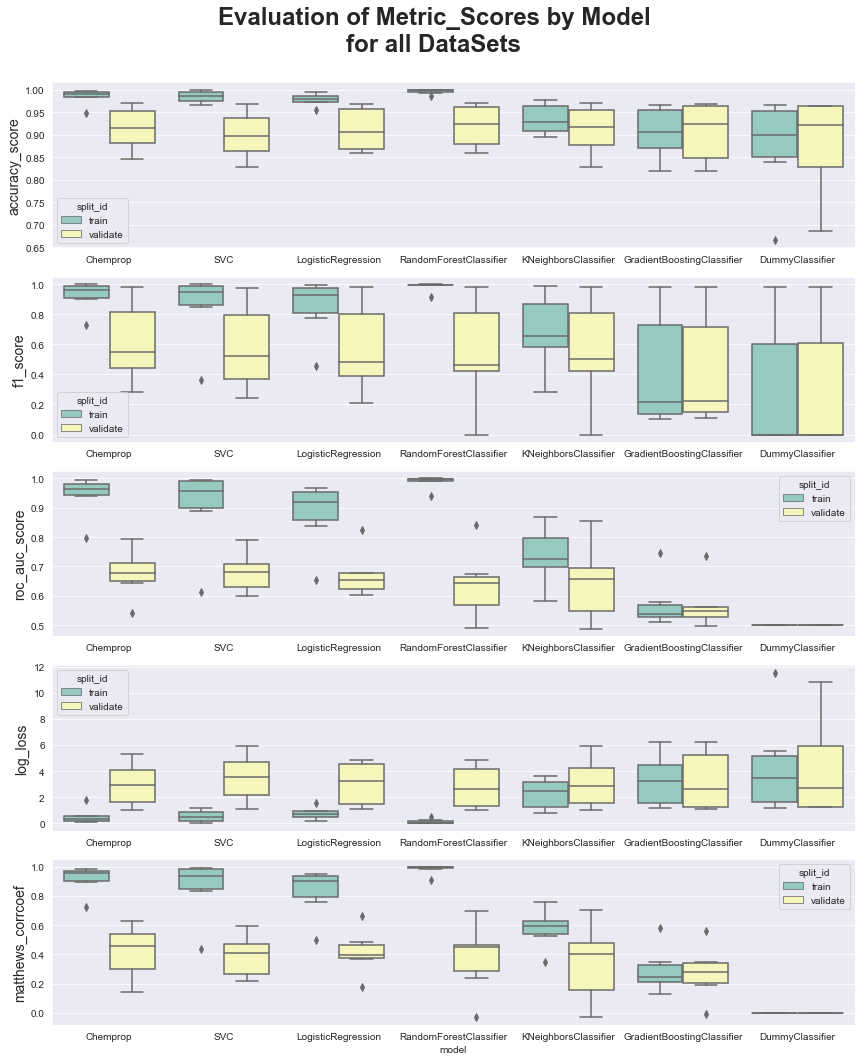

In [13]:
### Get results including Chemprop for Evaluation of Metric_Scores by Model for all DataSets

split_style = "random"

metrics = tdf['metric'].unique()

fig, axes = plt.subplots(len(metrics), figsize = (12,15))

for i, metric in enumerate(metrics):
    sns.boxplot(x="model", y="score", hue="split_id",
        data=tdf[(tdf['metric'] == metric) & (tdf["split_method"] == split_style)], palette="Set3", ax= axes[i])
    
    axes[i].set_ylabel(metric, fontsize = 14)
    if i != len(metrics) -1:
        axes[i].set_xlabel(None)
        
plt.suptitle("Evaluation of Metric_Scores by Model\nfor all DataSets\n", fontsize = 24, fontweight = "bold")
fig.tight_layout()

fig.savefig("Boxplot_Model_Scores.png", facecolor = "w")

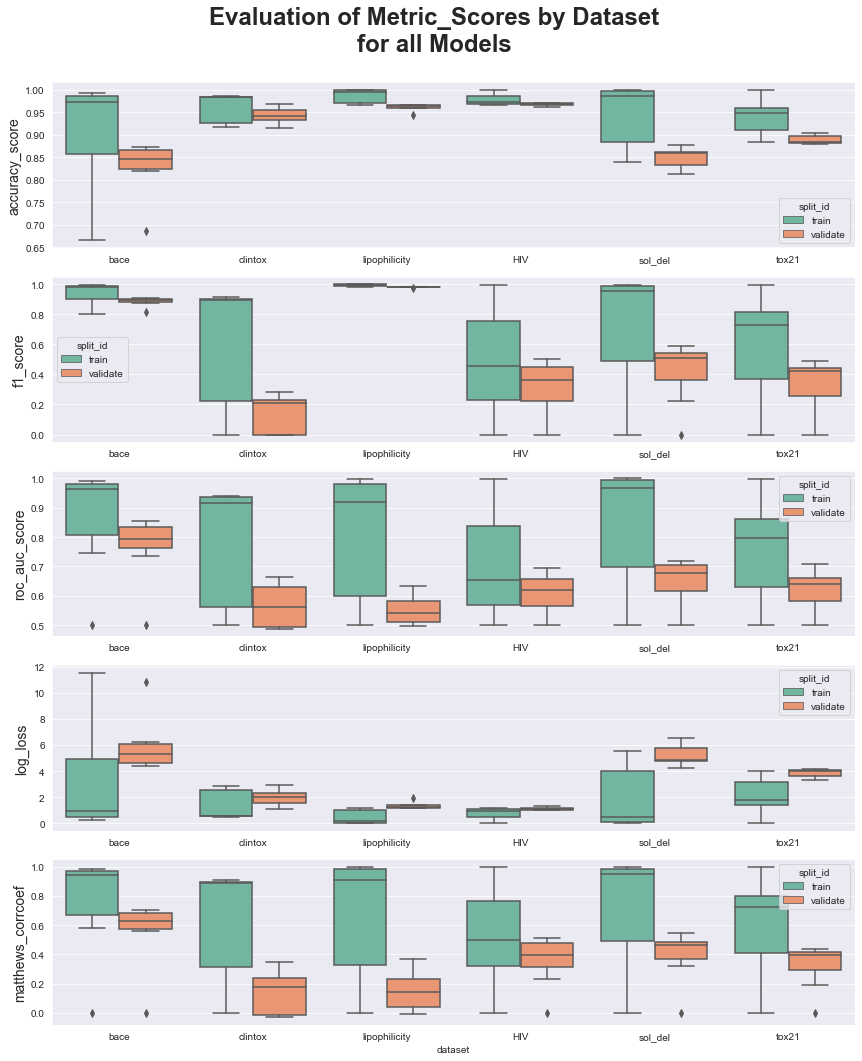

In [14]:
### Get results including Chemprop for Evaluation of Metric_Scores by Model for all DataSets

split_style = "random"

fig, axes = plt.subplots(len(metrics), figsize = (12,15))

for i, metric in enumerate(metrics):
    sns.boxplot(x="dataset", y="score", hue="split_id",
        data=tdf[(tdf['metric'] == metric) & (tdf["split_method"] == split_style)], palette="Set2", ax= axes[i])
    
    axes[i].set_ylabel(metric, fontsize = 14)
    if i != len(metrics) -1:
        axes[i].set_xlabel(None)
        
plt.suptitle("Evaluation of Metric_Scores by Dataset\nfor all Models\n", fontsize = 24, fontweight = "bold")
fig.tight_layout()

fig.savefig("Boxplot_Dataset_Scores.png", facecolor = "w")

In [18]:
tdf.groupby(['metric', "model", 'split_id']).agg({'score': ['mean', 'std']})[:20]

score          
                                                        mean       std
metric         model                      split_id                    
accuracy_score Chemprop                   train     0.981043  0.020469
                                          validate  0.887536  0.086438
               DummyClassifier            train     0.872894  0.112444
                                          validate  0.878283  0.112190
               GradientBoostingClassifier train     0.904811  0.058889
                                          validate  0.905916  0.068779
               KNeighborsClassifier       train     0.934345  0.034622
                                          validate  0.911435  0.055492
               LogisticRegression         train     0.977704  0.013937
                                          validate  0.912069  0.049877
               RandomForestClassifier     train     0.996210  0.005433
                                          validate  0.919563  0.048340
               SVC                        train     0.984333  0.013023
                                          validate  0.899066  0.053162
f1_score       Chemprop                   train     0.914751  0.103514
                                          validate  0.591769  0.297079
               DummyClassifier            train     0.296954  0.463673
                                          validate  0.299475  0.466963
               GradientBoostingClassifier train     0.420611  0.400227
                                          validate  0.422741  0.397584

In [79]:
# metrics = list(df["metric"].unique())

# input_dropdown = alt.binding_select(options= metrics, name='metric')
# selection = alt.selection_single(fields=['metric'], bind=input_dropdown)

# alt.Chart(df).mark_boxplot().encode(
#     row = alt.Row('model', header=alt.Header(orient='bottom')),
#     x = "score:Q",
#     y = alt.Y("split_id:N", title= None),
#     color = 'split_id:N').transform_filter(datum.metric == "accuracy_score")
# # ).add_selection(selection)#.transform_filter("accuracy_score")


In [80]:
# from vega_datasets import data

# cars = data.cars.url

# input_dropdown = alt.binding_select(options=['Europe','Japan','USA'], name='Country')
# selection = alt.selection_single(fields=['Origin'], bind=input_dropdown)

# alt.Chart(cars).mark_point().encode(
#     x='Horsepower:Q',
#     y='Miles_per_Gallon:Q',
#     color='Origin:N',
#     tooltip='Name:N'
# ).add_selection(
#     selection
# ).transform_filter(
#     selection
# )

In [81]:
# # from vega_datasets import data

# # cars = data.cars.url

# metrics = df['metric'].unique()

# input_dropdown = alt.binding_select(options=metrics, name='Country')
# selection = alt.selection_single(fields=['metric'], bind=input_dropdown)

# alt.Chart(df).mark_point().encode(
#     x='score:Q',
#     y='split_id:N',
#     color='split_id:N',
#     row = "model:N",
#     tooltip='dataset:N'
# ).add_selection(
#     selection
# ).transform_filter(
#     selection
# )